In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

In [2]:
df = pd.read_csv("/kaggle/input/bank-transaction-dataset-for-fraud-detection/bank_transactions_data_2.csv")
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [4]:
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


In [5]:
print(df.isnull().sum())

TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64


In [6]:
df.duplicated().sum()

0

No missing vales or duplicated values, hence dataset is clean.

In [8]:
df.nunique()

TransactionID              2512
AccountID                   495
TransactionAmount          2455
TransactionDate            2512
TransactionType               2
Location                     43
DeviceID                    681
IP Address                  592
MerchantID                  100
Channel                       3
CustomerAge                  63
CustomerOccupation            4
TransactionDuration         288
LoginAttempts                 5
AccountBalance             2510
PreviousTransactionDate     360
dtype: int64

In [7]:
print("\nUnique Accounts:", df['AccountID'].nunique())
print("Unique Devices:", df['DeviceID'].nunique())
print("Unique Locations:", df['Location'].nunique())
print("Unique Merchants:", df['MerchantID'].nunique())


Unique Accounts: 495
Unique Devices: 681
Unique Locations: 43
Unique Merchants: 100


In [8]:
#Convert Dates to Datetime Format
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['PreviousTransactionDate'] = pd.to_datetime(df['PreviousTransactionDate'])

In [10]:
#Label Encoding for Categorical Variables:
label_encoder = LabelEncoder()
df['TransactionType'] = label_encoder.fit_transform(df['TransactionType'])
df['Channel'] = label_encoder.fit_transform(df['Channel'])
df['CustomerOccupation'] = label_encoder.fit_transform(df['CustomerOccupation'])

In [11]:
import warnings
warnings.filterwarnings('ignore')

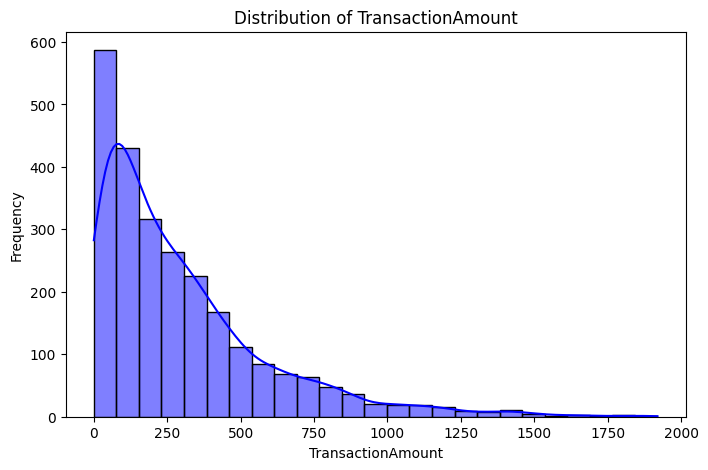

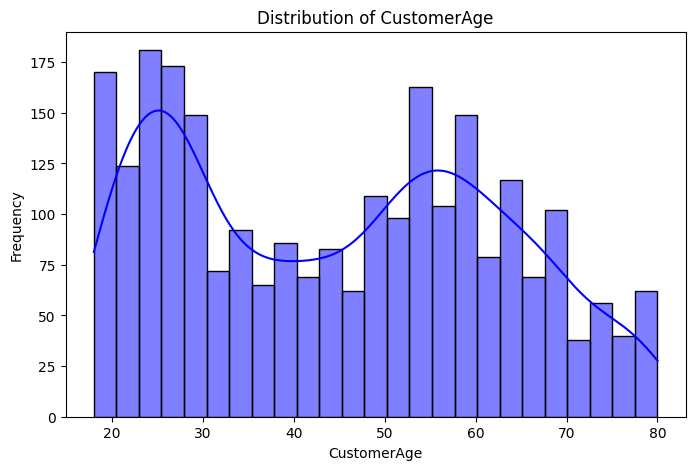

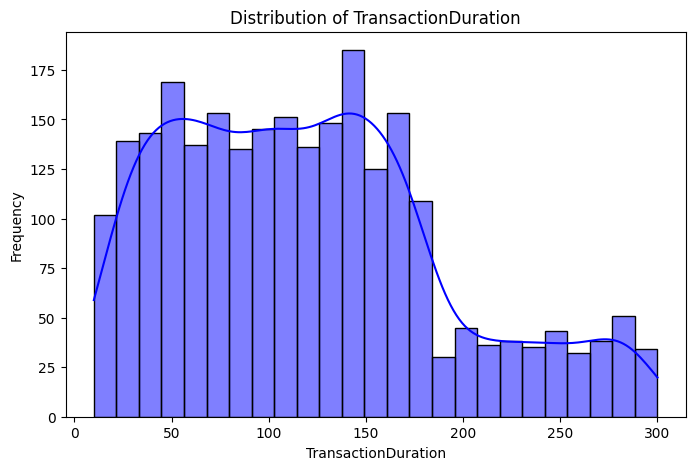

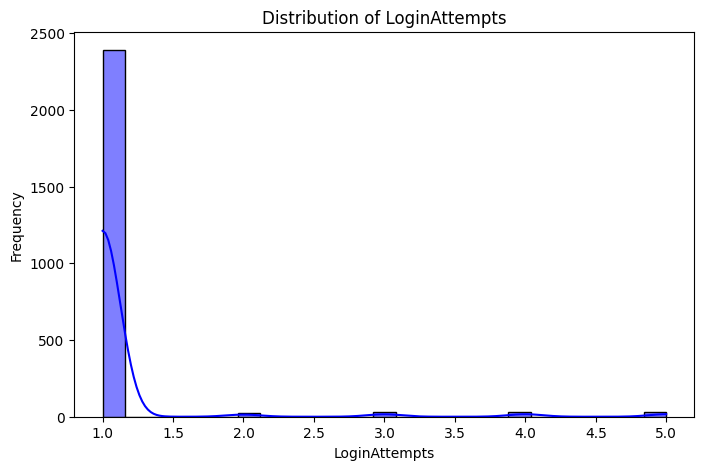

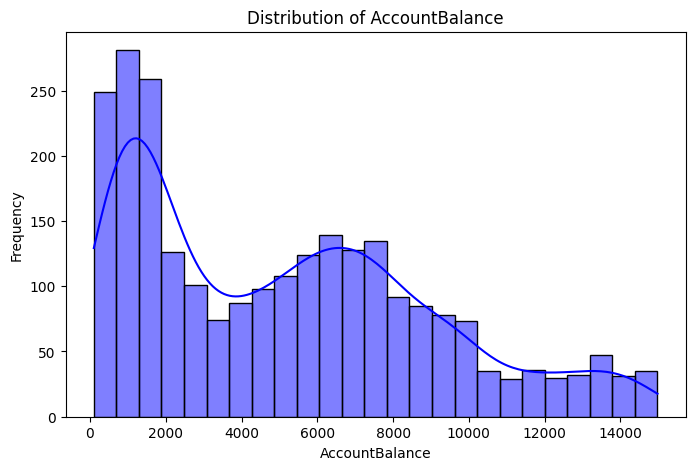

In [12]:
#€DA
def plot_histograms(df, num_columns):
    for column in num_columns:
        plt.figure(figsize=(8, 5))
        # Create a histogram with KDE
        sns.histplot(df[column], bins=25, kde=True, color='blue')  
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()


num_columns = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']

plot_histograms(df, num_columns)

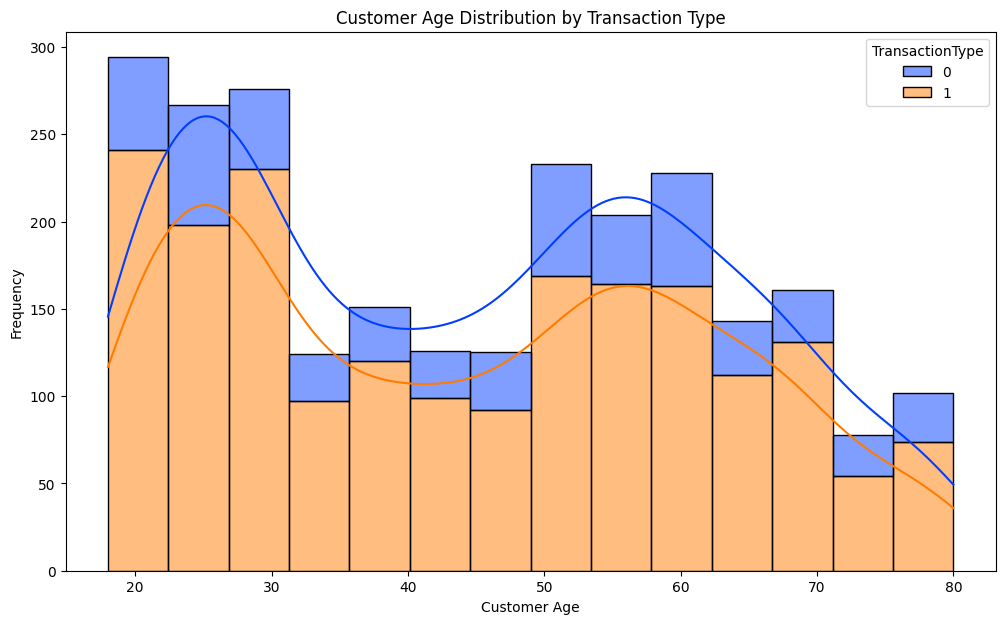

In [25]:
plt.figure(figsize=(12,7))
sns.histplot(data=df, x='CustomerAge', hue='TransactionType', multiple='stack', palette='bright', kde=True)
plt.title('Customer Age Distribution by Transaction Type')
plt.xlabel('Customer Age')
plt.ylabel('Frequency')
plt.show()

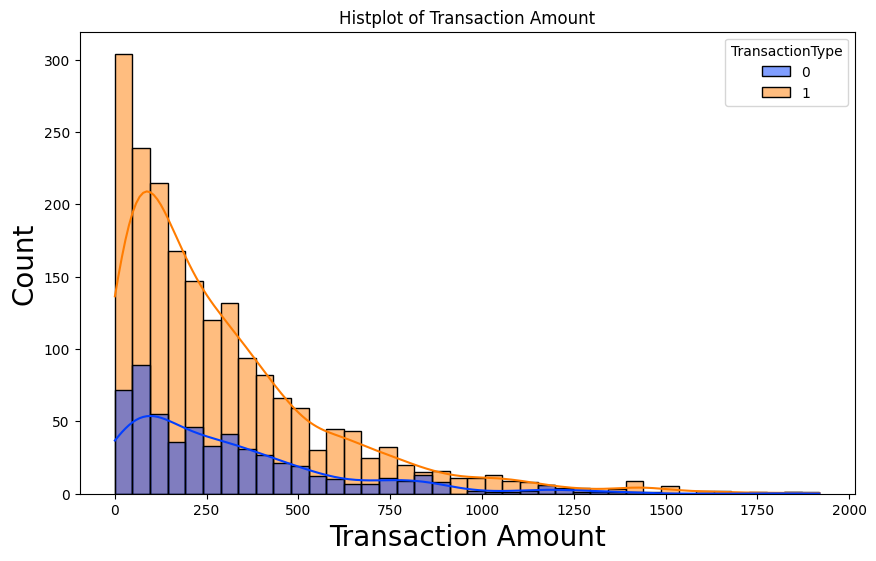

In [29]:
plt.figure(figsize=(10,6))

plt.xlabel("Transaction Amount", fontsize=20)
plt.ylabel("Count", fontsize=20)

plt.title("Histplot of Transaction Amount")

sns.histplot(data=df, x="TransactionAmount", kde=True, hue='TransactionType', palette='bright')

plt.show()

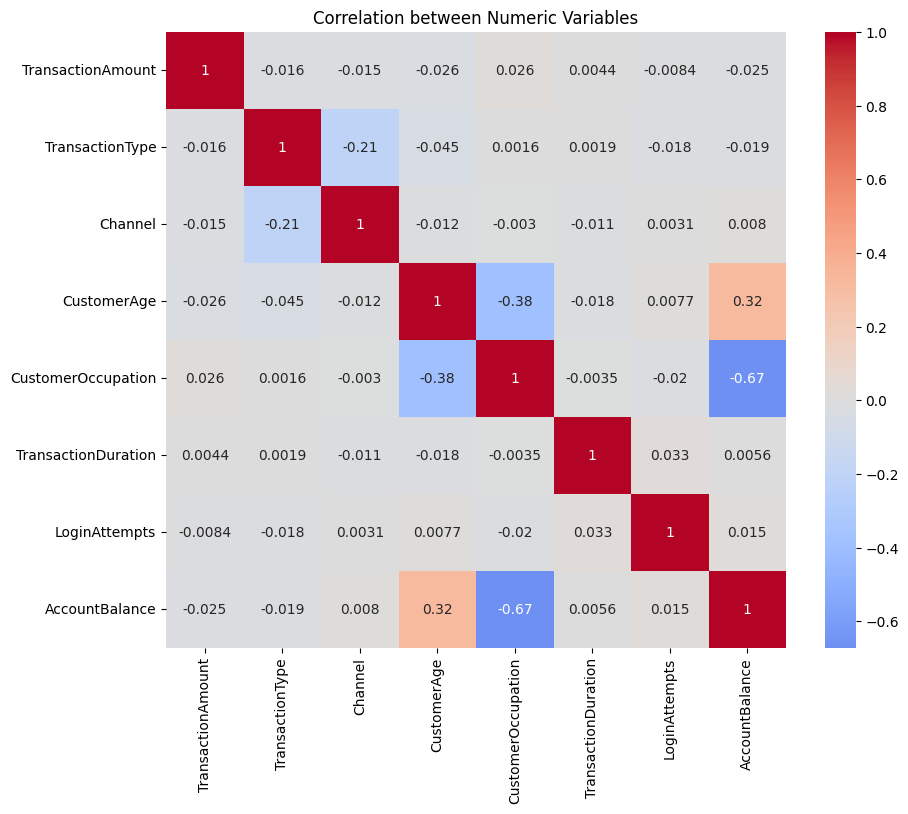

In [30]:
plt.figure(figsize=(10, 8))
numeric_cols = df.select_dtypes(include=[np.number]).columns
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation between Numeric Variables')
plt.show()

In [31]:
#K-Means Clustering
from sklearn.cluster import KMeans

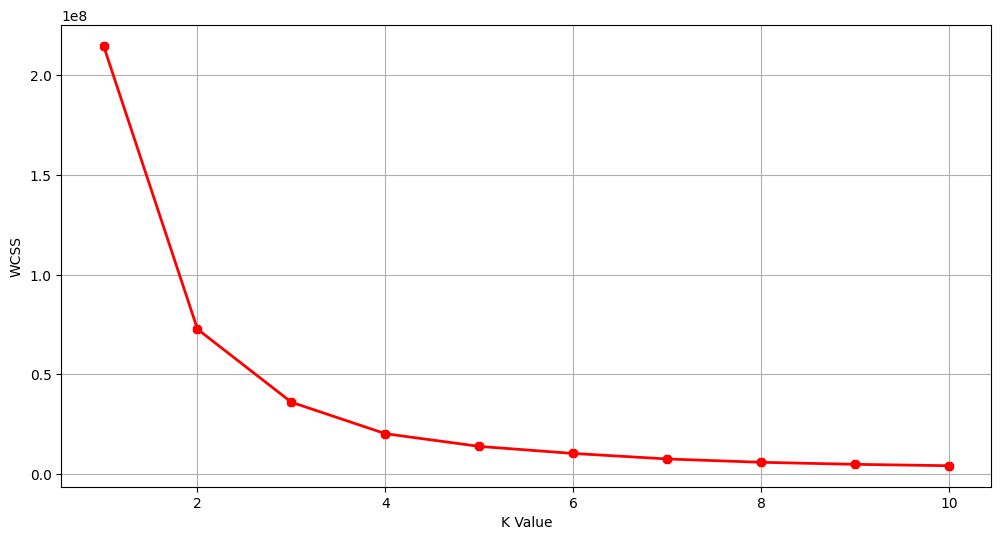

In [32]:
X1=df.loc[:, ["TransactionAmount", "CustomerAge"]].values

wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker="8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

# The graph seems to be constant after 4, so lets keep our number of clusters to be 4

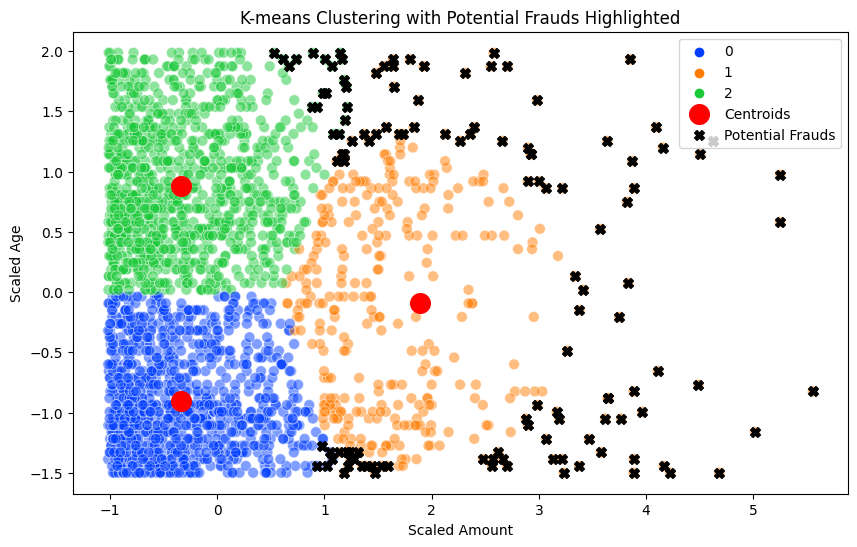

Number of potential frauds detected: 126


In [37]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select relevant features for clustering
X = df[['TransactionAmount', 'CustomerAge']]

# Standardize features for better clustering performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-Means clustering with 3 clusters and a fixed random seed
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Add cluster labels to the original data
df['KMeans_Cluster'] = kmeans_labels

# Calculate distances to centroids
distances = np.linalg.norm(X_scaled - kmeans.cluster_centers_[kmeans_labels], axis=1)

# Identify potential frauds based on distance threshold (e.g., top 5% farthest)
threshold = np.percentile(distances, 95)
df['Potential_Fraud'] = distances > threshold

# Separate fraudulent and non-fraudulent transactions
frauds = df[df['Potential_Fraud']]
non_frauds = df[~df['Potential_Fraud']]

# Visualization with highlighted potential frauds
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=X_scaled[:, 0], y=X_scaled[:, 1], hue=kmeans_labels, palette='bright', s=60, alpha=0.5
)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Centroids')
plt.scatter(X_scaled[distances > threshold, 0], X_scaled[distances > threshold, 1], color='black', s=50, label='Potential Frauds', marker='X')
plt.title('K-means Clustering with Potential Frauds Highlighted')
plt.xlabel('Scaled Amount')
plt.ylabel('Scaled Age')
plt.legend()
plt.show()

# Report the number of detected potential frauds
print(f"Number of potential frauds detected: {len(frauds)}")

Our model flagged 126 transactions as potential red flags, visualized as black 'X's on the plot. These outliers, far removed from their cluster's center, point to suspicious activity. By examining these anomalies, we can uncover hidden patterns associated with fraud. Moving forward, we'll dissect each cluster to pinpoint the unique characteristics that might signal fraudulent behavior.

In [38]:
#Isolation Forest for Fraud detection
from sklearn.ensemble import IsolationForest

model = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
model

IsolationForest(contamination=0.05, random_state=42)

In [39]:
model.fit(X)

IsolationForest(contamination=0.05, random_state=42)

In [45]:
columns_to_drop = ['TransactionID', 'AccountID', 'TransactionDate', 'Location', 'DeviceID', 'IP Address', 'MerchantID', 'PreviousTransactionDate']
data_new = df.drop(columns=columns_to_drop)
data_new.head()

## seperate out numerical and categorical columns
num_cols = data_new.select_dtypes(exclude='object').columns
cat_cols = data_new.select_dtypes(include='object').columns

print(f"Numerical columns : {num_cols}")
print(f"Categorical columns : {cat_cols}")

Numerical columns : Index(['TransactionAmount', 'TransactionType', 'Channel', 'CustomerAge',
       'CustomerOccupation', 'TransactionDuration', 'LoginAttempts',
       'AccountBalance', 'KMeans_Cluster', 'Potential_Fraud'],
      dtype='object')
Categorical columns : Index([], dtype='object')


In [46]:
predictions = model.predict(X)

In [47]:
data_new.columns

Index(['TransactionAmount', 'TransactionType', 'Channel', 'CustomerAge',
       'CustomerOccupation', 'TransactionDuration', 'LoginAttempts',
       'AccountBalance', 'KMeans_Cluster', 'Potential_Fraud'],
      dtype='object')

<Axes: xlabel='CustomerAge', ylabel='TransactionAmount'>

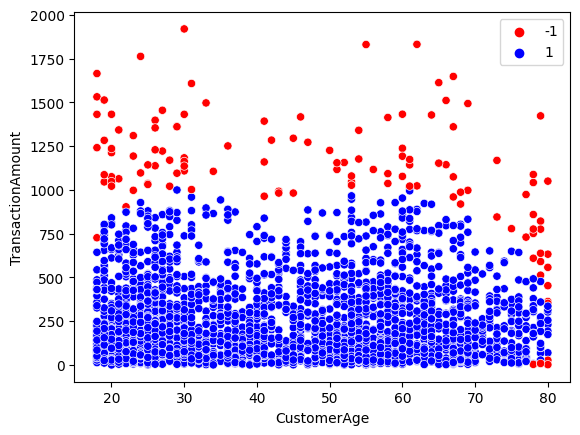

In [48]:
## plotting the predictions
sns.scatterplot(data=data_new, x='CustomerAge', y='TransactionAmount', hue=predictions, 
                palette={1: "blue", -1: "red"})

The Red colour are the fraud transactions.